In [ ]:
# Test 5
# This test uses a simple CNN to classify between having an circle or not

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-23 20:09:42.204735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 20:09:42.204843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 20:09:42.358552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-23 20:09:42.449827: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 20:09:43.698981: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_5/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_5/test'

In [3]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 11000 files belonging to 2 classes.


2024-04-23 20:09:50.794498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 20:09:50.794928: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 20:09:50.795315: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


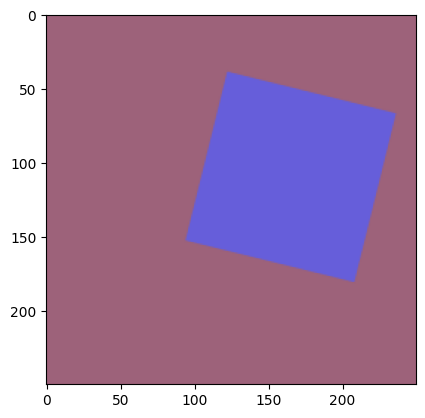

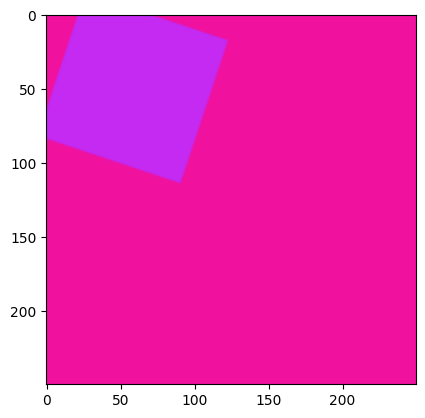

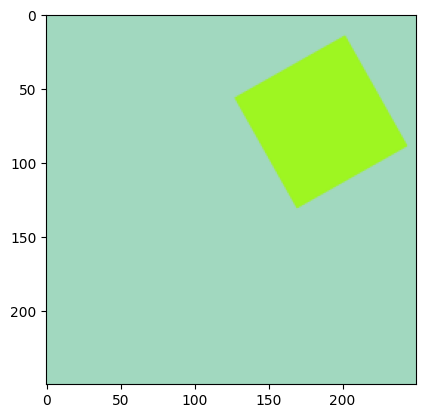

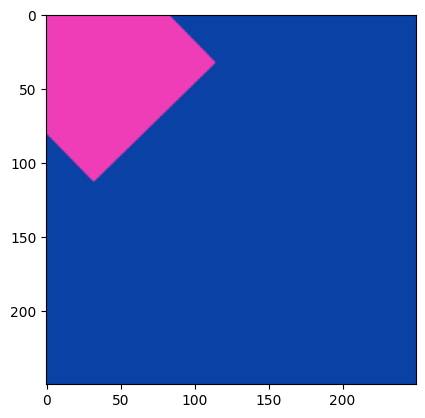

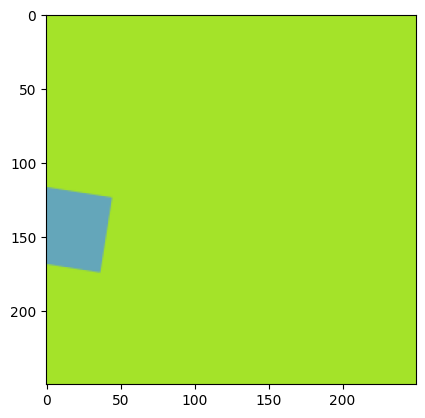

In [5]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                        

In [8]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
checkpoint_filepath = 'models/5/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    verbose=1)


In [10]:
history = model.fit(train_dataset, epochs=30, batch_size=32, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/30


2024-04-23 20:10:36.105390: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-23 20:10:36.346979: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-23 20:10:38.771653: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0ba0267900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-23 20:10:38.771677: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-04-23 20:10:38.784174: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713899438.849109   36032 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 [==============================] - ETA: 0s - loss: 0.5920 - acc: 0.6773
Epoch 1: val_loss improved from inf to 0.48204, saving model to models/5/ch-001.ckpt
INFO:tensorflow:Assets written to: models/5/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-001.ckpt/assets


344/344 [==============================] - 51s 125ms/step - loss: 0.5920 - acc: 0.6773 - val_loss: 0.4820 - val_acc: 0.7938
Epoch 2/30
344/344 [==============================] - ETA: 0s - loss: 0.4584 - acc: 0.8022
Epoch 2: val_loss improved from 0.48204 to 0.45640, saving model to models/5/ch-002.ckpt
INFO:tensorflow:Assets written to: models/5/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-002.ckpt/assets


344/344 [==============================] - 42s 120ms/step - loss: 0.4584 - acc: 0.8022 - val_loss: 0.4564 - val_acc: 0.7934
Epoch 3/30
344/344 [==============================] - ETA: 0s - loss: 0.4086 - acc: 0.8238
Epoch 3: val_loss improved from 0.45640 to 0.37688, saving model to models/5/ch-003.ckpt
INFO:tensorflow:Assets written to: models/5/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-003.ckpt/assets


344/344 [==============================] - 40s 115ms/step - loss: 0.4086 - acc: 0.8238 - val_loss: 0.3769 - val_acc: 0.8350
Epoch 4/30
344/344 [==============================] - ETA: 0s - loss: 0.3474 - acc: 0.8559
Epoch 4: val_loss improved from 0.37688 to 0.33843, saving model to models/5/ch-004.ckpt
INFO:tensorflow:Assets written to: models/5/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-004.ckpt/assets


344/344 [==============================] - 42s 120ms/step - loss: 0.3474 - acc: 0.8559 - val_loss: 0.3384 - val_acc: 0.8534
Epoch 5/30
344/344 [==============================] - ETA: 0s - loss: 0.3021 - acc: 0.8796
Epoch 5: val_loss improved from 0.33843 to 0.30561, saving model to models/5/ch-005.ckpt
INFO:tensorflow:Assets written to: models/5/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-005.ckpt/assets


344/344 [==============================] - 44s 125ms/step - loss: 0.3021 - acc: 0.8796 - val_loss: 0.3056 - val_acc: 0.8734
Epoch 6/30
344/344 [==============================] - ETA: 0s - loss: 0.2632 - acc: 0.8996
Epoch 6: val_loss improved from 0.30561 to 0.25844, saving model to models/5/ch-006.ckpt
INFO:tensorflow:Assets written to: models/5/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-006.ckpt/assets


344/344 [==============================] - 41s 117ms/step - loss: 0.2632 - acc: 0.8996 - val_loss: 0.2584 - val_acc: 0.9044
Epoch 7/30
344/344 [==============================] - ETA: 0s - loss: 0.2274 - acc: 0.9155
Epoch 7: val_loss improved from 0.25844 to 0.22911, saving model to models/5/ch-007.ckpt
INFO:tensorflow:Assets written to: models/5/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-007.ckpt/assets


344/344 [==============================] - 41s 119ms/step - loss: 0.2274 - acc: 0.9155 - val_loss: 0.2291 - val_acc: 0.9176
Epoch 8/30
344/344 [==============================] - ETA: 0s - loss: 0.1959 - acc: 0.9301
Epoch 8: val_loss improved from 0.22911 to 0.22186, saving model to models/5/ch-008.ckpt
INFO:tensorflow:Assets written to: models/5/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-008.ckpt/assets


344/344 [==============================] - 40s 116ms/step - loss: 0.1959 - acc: 0.9301 - val_loss: 0.2219 - val_acc: 0.9156
Epoch 9/30
344/344 [==============================] - ETA: 0s - loss: 0.1703 - acc: 0.9403
Epoch 9: val_loss improved from 0.22186 to 0.20610, saving model to models/5/ch-009.ckpt
INFO:tensorflow:Assets written to: models/5/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-009.ckpt/assets


344/344 [==============================] - 41s 119ms/step - loss: 0.1703 - acc: 0.9403 - val_loss: 0.2061 - val_acc: 0.9234
Epoch 10/30
344/344 [==============================] - ETA: 0s - loss: 0.1472 - acc: 0.9508
Epoch 10: val_loss improved from 0.20610 to 0.18747, saving model to models/5/ch-010.ckpt
INFO:tensorflow:Assets written to: models/5/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-010.ckpt/assets


344/344 [==============================] - 44s 126ms/step - loss: 0.1472 - acc: 0.9508 - val_loss: 0.1875 - val_acc: 0.9352
Epoch 11/30
344/344 [==============================] - ETA: 0s - loss: 0.1280 - acc: 0.9565
Epoch 11: val_loss did not improve from 0.18747
344/344 [==============================] - 42s 121ms/step - loss: 0.1280 - acc: 0.9565 - val_loss: 0.1915 - val_acc: 0.9346
Epoch 12/30
344/344 [==============================] - ETA: 0s - loss: 0.1119 - acc: 0.9616
Epoch 12: val_loss improved from 0.18747 to 0.16975, saving model to models/5/ch-012.ckpt
INFO:tensorflow:Assets written to: models/5/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-012.ckpt/assets


344/344 [==============================] - 45s 130ms/step - loss: 0.1119 - acc: 0.9616 - val_loss: 0.1698 - val_acc: 0.9430
Epoch 13/30
344/344 [==============================] - ETA: 0s - loss: 0.0985 - acc: 0.9678
Epoch 13: val_loss improved from 0.16975 to 0.16676, saving model to models/5/ch-013.ckpt
INFO:tensorflow:Assets written to: models/5/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/5/ch-013.ckpt/assets


344/344 [==============================] - 41s 117ms/step - loss: 0.0985 - acc: 0.9678 - val_loss: 0.1668 - val_acc: 0.9448
Epoch 14/30
344/344 [==============================] - ETA: 0s - loss: 0.0887 - acc: 0.9705
Epoch 14: val_loss did not improve from 0.16676
344/344 [==============================] - 43s 125ms/step - loss: 0.0887 - acc: 0.9705 - val_loss: 0.1795 - val_acc: 0.9406
Epoch 15/30
344/344 [==============================] - ETA: 0s - loss: 0.0796 - acc: 0.9727
Epoch 15: val_loss did not improve from 0.16676
344/344 [==============================] - 44s 124ms/step - loss: 0.0796 - acc: 0.9727 - val_loss: 0.1736 - val_acc: 0.9450
Epoch 16/30
344/344 [==============================] - ETA: 0s - loss: 0.0695 - acc: 0.9776
Epoch 16: val_loss did not improve from 0.16676
344/344 [==============================] - 41s 119ms/step - loss: 0.0695 - acc: 0.9776 - val_loss: 0.1794 - val_acc: 0.9458
Epoch 17/30
344/344 [==============================] - ETA: 0s - loss: 0.0637 - acc:

In [11]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=32)
print(val_loss, val_acc)

157/157 [==============================] - 7s 42ms/step - loss: 0.2956 - acc: 0.9470
0.2956468462944031 0.9470000267028809


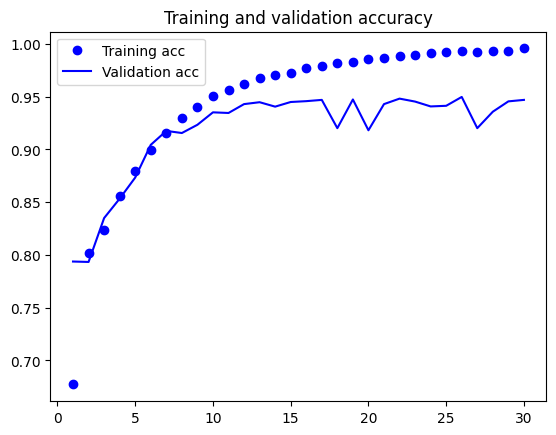

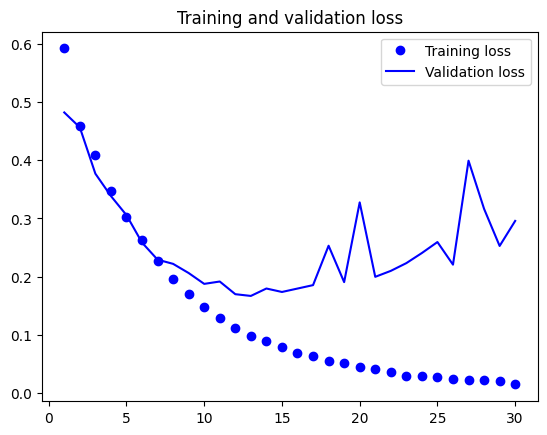

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/5/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/5/train_test_acc",dpi=100)
plt.show()

In [13]:
# save history data to file
import os
# save data
np.save('history/5/acc',acc)
np.save('history/5/val_acc',val_acc)
np.save('history/5/loss',loss)
np.save('history/5/val_loss',val_loss)

In [16]:
model.save('models/5/model.keras')

In [9]:
model = keras.models.load_model('models/5/model.keras')

2024-04-23 12:57:03.757068: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-04-23 12:57:04.793113: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.


In [17]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
5000
0
265


In [18]:
# write the wrong filenames to a file
with open('results/5/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [20]:
import csv
import os

output_csv = 'results/5/failed_squares.csv'
failed_filenames_txt = 'results/5/failed_filenames.txt'
source_file = '../../Dataset_Scripts/Datasets/Dataset_5/data/squares.csv'

# Extract short filenames from failed_filenames.txt
failed_filenames = set()
with open(failed_filenames_txt, 'r') as f1:
    for line in f1:
        filename = os.path.basename(line.strip())  # Get short filename
        failed_filenames.add(filename)

# Open output CSV file for writing
out = open(output_csv, 'w', newline='')
out_writer = csv.writer(out)

# Iterate over rows in squares.csv
with open(source_file, 'r') as f:
    reader = csv.DictReader(f)
    # Write header to output CSV
    out_writer.writerow(reader.fieldnames)
    # Iterate over rows
    for row in reader:
        # Extract filename from the current row
        filename = os.path.basename(row['Filename'])
        # Check if filename is in the set of failed filenames
        if filename in failed_filenames:
            # Write the row to the output CSV
            out_writer.writerow(row.values())

# Close output CSV file
out.close()

In [21]:
import shutil
output_folder = 'results/5/failed_images'
file_name = 'results/5/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

with open(file_name, 'r') as file:
    lines = file.readlines()

for line in lines:
    line = line.strip()
    if os.path.exists(line):
        filename = os.path.basename(line)
        shutil.copy(line, os.path.join(output_folder, filename))
    else:
        print(f"Image path '{line}' does not exist.")